                Statement of Work (SOW2): AIDI-1002-01 - AI ALGORITHMS 1


                           Project Title : Real Estate Price Prediction using Regression 


Group Members : 
Oluwaseun Ogunnubi (100811706), 
Chiraz Marrekchi (100837601), 
Keith Frank (100838622) 

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from termcolor import colored as cl # text customization

columns = [ 'No.','Transaction_date','House_age','Distance_to_MRT_station','No_of_Convenience_Store', 'Latitude', 'Longitude', 'House_price_per_unit_area']
# Read the data set of "Real Estate" in data.
data= pd.read_csv('Real estate.csv',names=columns,sep=',', skiprows=1, )
data.pop('No.')

# Printing the data
data

,Transaction_date,House_age,Distance_to_MRT_station,No_of_Convenience_Store,Latitude,Longitude,House_price_per_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
type(data)

pandas.core.frame.DataFrame

In [7]:
##clean up data

data.dropna()

#Checking the missing values
data.isnull().sum()
print(cl(data.isnull().sum(), attrs = ['bold']))

Transaction_date             0
House_age                    0
Distance_to_MRT_station      0
No_of_Convenience_Store      0
Latitude                     0
Longitude                    0
House_price_per_unit_area    0
dtype: int64


In [ ]:

# ------------------------------------------
# *No need to scale data, as data we have is of age, price, number of convience stores , prices etc and cannot be scaled *

# **We are using one data source so we won't harmonize our data **

#-----------------------------------------



In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_date           414 non-null    float64
 1   House_age                  414 non-null    float64
 2   Distance_to_MRT_station    414 non-null    float64
 3   No_of_Convenience_Store    414 non-null    int64  
 4   Latitude                   414 non-null    float64
 5   Longitude                  414 non-null    float64
 6   House_price_per_unit_area  414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [5]:
list(data.columns)

['Transaction_date',
 'House_age',
 'Distance_to_MRT_station',
 'No_of_Convenience_Store',
 'Latitude',
 'Longitude',
 'House_price_per_unit_area']

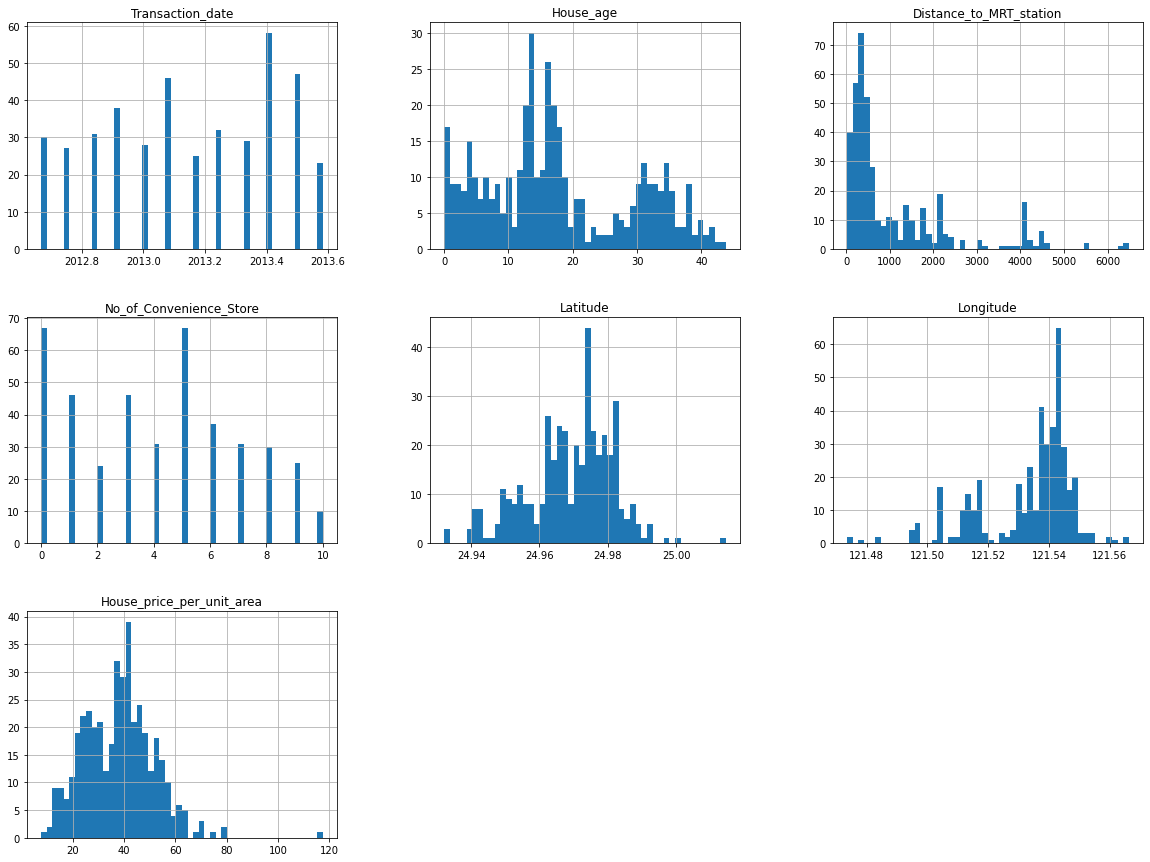

In [143]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
#EDA 
import sweetviz as sv


estate_report = sv.analyze(data)

estate_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
X1 = data["Transaction_date"]
X2 = data["House_age"] 
X3 = data["Distance_to_MRT_station"] 
X4 = data["No_of_Convenience_Store"]
X5 = data["Latitude"] 
X6 = data["Longitude"]

Y = data["House_price_per_unit_area"]

In [14]:
#Performing data Analysis 

import statistics as st

#get mean of houses age
House_age_mean = st.mean(X2)


House_age_mean


17.71256038647343

In [15]:
#get mean of houses price
House_price_mean = st.mean(Y)
House_price_mean

37.980193236714975

In [16]:
#get median of number of convenience stores 
median_number_of_Stores = st.median(X4)
median_number_of_Stores

4.0

In [13]:
import matplotlib.pyplot as plt


price_age = pd.DataFrame({"Price" : Y, "age" : X2})
#study correlation between house price and house age 


price_age_corr = np.corrcoef(Y, X2)
price_age_corr

array([[ 1.        , -0.21056705],
       [-0.21056705,  1.        ]])

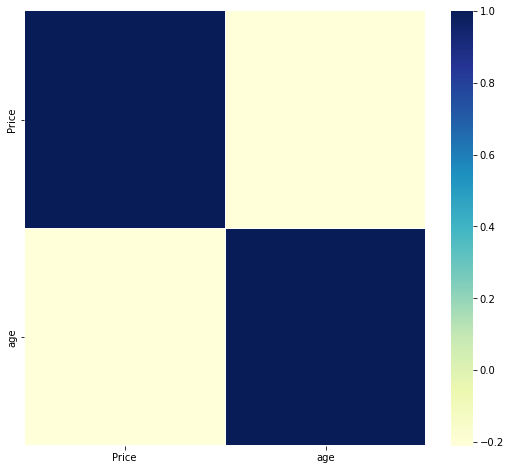

In [146]:
import seaborn as sns
corrmat = price_age.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

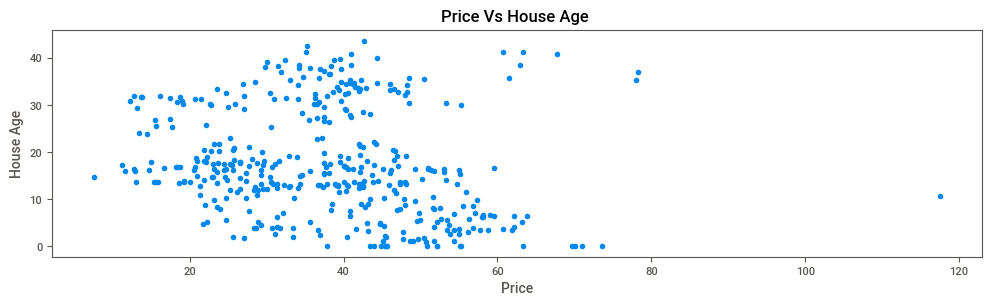

In [18]:
np.seterr(divide='ignore', invalid='ignore')
rho = np.corrcoef(price_age)

fig, ax = plt.subplots(nrows=1,  figsize=(12, 3))

ax.scatter(Y, X2)
ax.title.set_text('Price Vs House Age ' )
ax.set(xlabel='Price',ylabel='House Age')
fig.subplots_adjust(wspace=.4)    
plt.show()

In [20]:
#study correclation between house price and number of convenience stores

price_stores = pd.DataFrame({"Price" : Y, "stores" : X4})

price_stores_corr = np.corrcoef(Y, X4)
price_stores_corr

array([[1.        , 0.57100491],
       [0.57100491, 1.        ]])

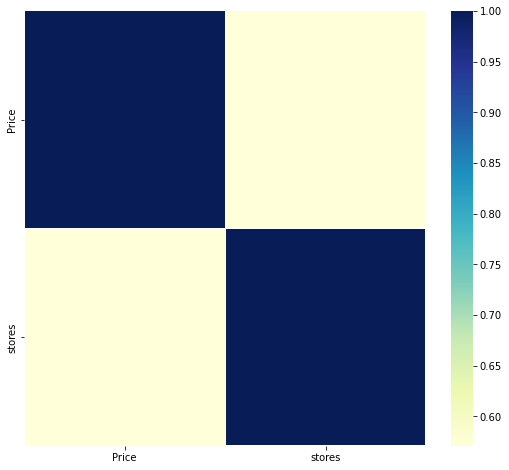

In [149]:
corrmat = price_stores.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

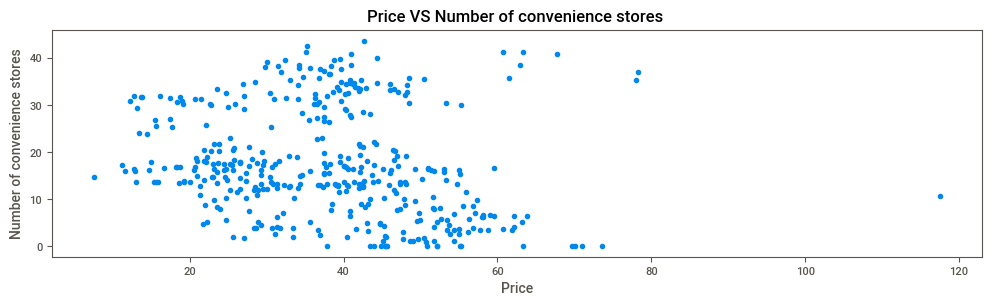

In [21]:
rho = np.corrcoef(price_stores)

fig, ax = plt.subplots(nrows=1,  figsize=(12, 3))

ax.scatter(Y, X2)
ax.title.set_text('Price VS Number of convenience stores ' )
ax.set(xlabel='Price',ylabel='Number of convenience stores')
fig.subplots_adjust(wspace=.4)    
plt.show()

In [151]:
#House Price/unit Area
Y.describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: House_price_per_unit_area, dtype: float64

In [152]:
#House_Age
X2.describe()

count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: House_age, dtype: float64

In [153]:
#Distance_to_MRT_station"
X3.describe()

count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: Distance_to_MRT_station, dtype: float64

In [154]:
#Hypothesis testing 
from scipy.stats import ttest_1samp

#checking whether avg house age is less than or equal to 10 years 

#H0 : House age is less than or equal to 10 years
#H1 : House age is less than 10 years 

tset, pval = ttest_1samp(X2,10)


print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

p-values 8.692911470029788e-36
 we are rejecting null hypothesis


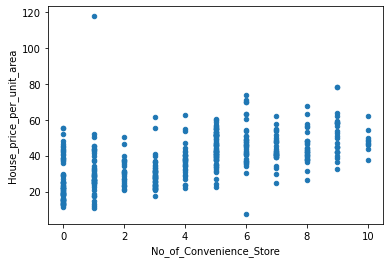

_______________________________________________________________
  


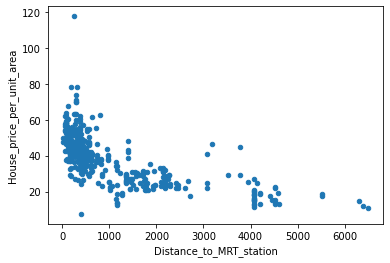

In [155]:
#plot the scatter plot of No_of_Convenience_Store and House_price_per_unit_area variable in data
data.plot.scatter(x="No_of_Convenience_Store",y="House_price_per_unit_area")
plt.show()
print("_______________________________________________________________")
print("  ")
#plot the scatter plot of Distance_to_MRT_station and House_price_per_unit_area variable in data
data.plot.scatter(x="Distance_to_MRT_station",y="House_price_per_unit_area")
plt.show()

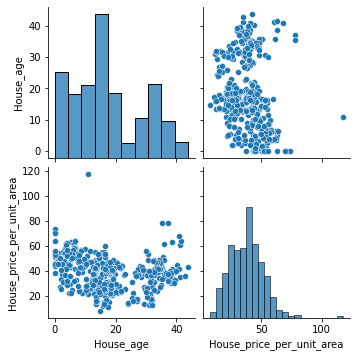

In [156]:
#plot the pair plot of House_age and House_price_per_unit_area in data dataframe.
sns.pairplot(data = data, vars=['House_age','House_price_per_unit_area'])
plt.show()

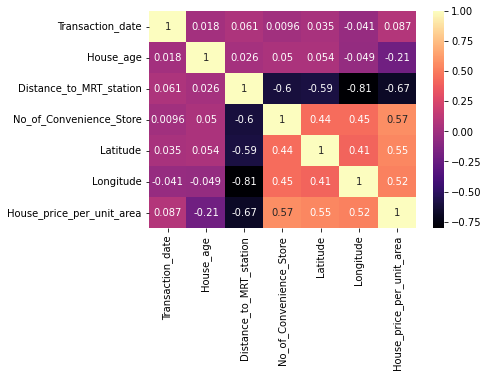

In [157]:
#  Heatmap

sns.heatmap(data.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

                           Distance_to_MRT_station  ...  House_price_per_unit_area
Distance_to_MRT_station                   1.000000  ...                  -0.673613
No_of_Convenience_Store                  -0.602519  ...                   0.571005
House_price_per_unit_area                -0.673613  ...                   1.000000

[3 rows x 3 columns]
  


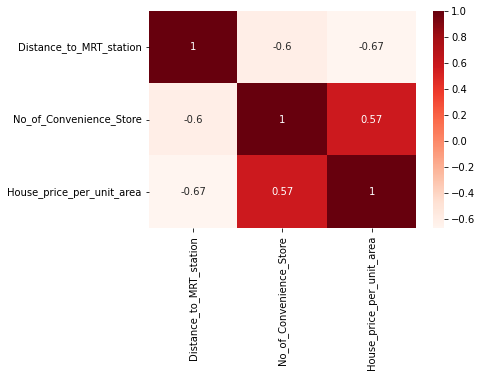

In [158]:
# Creating a matrix using 'Distance_to_MRT_station','No_of_Convenience_Store','House_price_per_unit_area' as rows and columns
data_corr = data[['Distance_to_MRT_station','No_of_Convenience_Store','House_price_per_unit_area']].corr()
print(data_corr)
print("  ")
#plot the correlation matrix of 'Distance_to_MRT_station','No_of_Convenience_Store','House_price_per_unit_area' in data dataframe.
sns.heatmap(data[['Distance_to_MRT_station','No_of_Convenience_Store','House_price_per_unit_area']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [2]:
# Benefits of Feature Engineering for Optimal Model Output
#In AI, your model is just ever as great as the information you train it on. As such a critical extent of your work
#ought to be centered around making a dataset that is enhanced to boost the data density of your information.
#Feature engineering and selection are the strategies utilized for accomplishing this objective. 
#Feature engineering is the process by which data is utilized to build variables and features that can be utilized
#to prepare a predictive model. Designing and choosing the right elements for a model will significantly work on 
#its predictive power, also it will likewise offer the adaptability to utilize less perplexing models that are 
#quicker to run and more effortlessly comprehended.
#A few of the the benefits of feature engineering are listed below:
#1) We can feature and concentrate key data, which assists calculations with accomplishing great outcomes.  
#2) When we comprehend the depth of feature engineering of a particular information, we can get others' area skill.  
#3) Feature engineering is the most common way of changing crude information into highlights that better address 
#the hidden issue to the predictive models, bringing about better model accuracy on unseen data.  
#4) Improves performance of AI models. 
#5) Decomposing or Dividing Features: One type of feature engineering is to decompose crude attributes into features
#that will be simpler to decipher patterns from. For instance, decomposing dates or timestamp factors into a variety
#of constituents might permit models to find and take advantage of connections. 
#6) Data Improvement: Data improvement is the most common way of making new features by presenting information from
#outer sources. Remotely grouped information is significant in prediction achievement, there are plenty of open data
#sets that will as a rule make effective features. 
#7) Feature Changes: Feature changes can incorporate amassing or joining attributes to make new features. Helpful
#and relevant features will rely upon the problem at hand, however averages, sums and ratios over various groupings
#can more readily open patterns to a model. 
#8) Automated feature engineering: Designing features manually can be extremely tedious and requires a decent 
#comprehension of the fundamental information, structures in the information, the issue you are attempting to 
#address and how best to address the information to have the ideal impact. Manual feature engineering is problem 
#specific and can't be applied to another dataset or issue.

In [3]:
#Key Candidate Features between Synthesized and Real Data for our Model Input

#Synthesized Data                                       |       Real Data
#1) Safe data-sharing and effective data stewardship	|  Unsafe information sharing
#2) Data privacy and quality assessment	                |  No information security
#3) Transparent controls for data privacy	            |  Not straightforward controls for information security
#4) Seamless integration with systems	                |  Inconsistent reconciliation with frameworks
#5) Accuracy at your control	                        |  Accuracy is not easily controlled
#6) Extended support for different data types	        |  No support for different data types
#7) Automation	                                        |  No computerization
#8) Synthesize datasets without size limitations	    |  You can’t blend datasets without size restrictions
